# A MULTI-OBJECTIVE APPROACH FOR PRACTICAL PORTFOLIO OPTIMIZATION PROBLEM

## Install requirements

In [2]:
from IPython.display import clear_output

In [4]:
!pip install yfinance
!pip install fix_yahoo_finance
!pip install pymoo
clear_output()

In [5]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

## Pull the stock price data

In [7]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '2020-04-30' #'2022-04-30'
end_date = '2025-04-30'   #'2025-04-30'

# Set the ticker
# ticker = ['AMZN', 'SPY', 'TSLA', 'FB']


ticker = ['SPY', 'META', 'JCI', 'CMCSA', 'CPB', 'MO', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T'] #changing fb to meta

# Get the data
data = yf.download(ticker, start_date, end_date, auto_adjust=False) # adding auto_adjust=False to get Adj Close
data

[*********************100%***********************]  24 of 24 completed


Price       Adj Close                                                          \
Ticker            BAX        BMY      CMCSA        CNP        CPB          DE   
Date                                                                            
2020-04-30  80.126823  50.641907  33.012783  14.892096  42.546532  135.719360   
2020-05-01  79.278450  50.183868  32.442528  14.393649  42.912575  129.291763   
2020-05-04  78.763969  50.108921  31.775784  14.306203  43.227554  124.379799   
2020-05-05  80.090706  51.099941  31.626635  14.332438  43.312683  126.447502   
2020-05-06  79.350624  50.908394  30.828293  13.973909  43.040268  123.621979   
...               ...        ...        ...        ...        ...         ...   
2025-04-23  29.600000  48.529999  34.470001  37.340000  37.500000  456.440002   
2025-04-24  30.410000  48.689999  33.189999  37.900002  36.720001  464.510010   
2025-04-25  30.219999  47.900002  33.900002  38.189999  36.290001  459.299988   
2025-04-28  30.530001  48.459999  33.770000  38.240002  35.840000  460.200012   
2025-04-29  30.980000  49.220001  33.939999  38.240002  36.040001  460.640015   

Price                                                    ...   Volume  \
Ticker            HPQ        JCI         JPM        LUV  ...       NI   
Date                                                     ...            
2020-04-30  13.165032  26.037798   83.326813  29.534527  ...  2955700   
2020-05-01  12.485986  24.919716   81.142700  27.625412  ...  2207300   
2020-05-04  12.647258  25.519009   80.176826  26.047089  ...  2369500   
2020-05-05  12.570865  25.626345   80.054985  24.969669  ...  3466600   
2020-05-06  12.443543  25.322224   78.549614  23.561462  ...  4410100   
...               ...        ...         ...        ...  ...      ...   
2025-04-23  24.629999  78.279999  240.880005  25.520000  ...  6163500   
2025-04-24  25.330000  80.360001  244.639999  26.459999  ...  2600400   
2025-04-25  25.280001  81.070000  243.550003  26.490000  ...  3746600   
2025-04-28  25.389999  81.099998  243.220001  26.650000  ...  4831700   
2025-04-29  25.520000  82.330002  244.619995  27.260000  ...  4960000   

Price                                                                         \
Ticker         PCAR      PSA      SEE        SPY         T      TMO      TXT   
Date                                                                           
2020-04-30  2944050  1572900  1689500  122901700  53955516  2215000  3404400   
2020-05-01  3137400  1570100  2447000  125180000  48791121  1603100  2524700   
2020-05-04  2596800   979800  1821000   80873200  46557268  1189000  2952000   
2020-05-05  2340450  1227200  1994200   79569900  32604956  1139900  1752700   
2020-05-06  2485050   720600  1473200   73632600  59704721  1215600  2307100   
...             ...      ...      ...        ...       ...      ...      ...   
2025-04-23  2799100   709600  1468200   90590700  43351000  3492200  2115200   
2025-04-24  2874600   689700  2128000   64150400  43640800  3662400  1980700   
2025-04-25  2869200   909800  1928300   61119600  37050300  2698300  1698000   
2025-04-28  3381900   844100  1477800   47613800  24156000  2531600  1610700   
2025-04-29  8488700   621300  1379000   47775100  25015800  2437300  1227800   

Price                          
Ticker            VZ     ZION  
Date                           
2020-04-30  17532400  2726900  
2020-05-01  13857400  4477600  
2020-05-04  11833600  3109600  
2020-05-05  10902400  3344100  
2020-05-06  12460400  3038700  
...              ...      ...  
2025-04-23  29402100  2005700  
2025-04-24  16597300  1628600  
2025-04-25  23361900   992900  
2025-04-28  16188500  1874800  
2025-04-29  14712800  1486900  

[1256 rows x 144 columns]

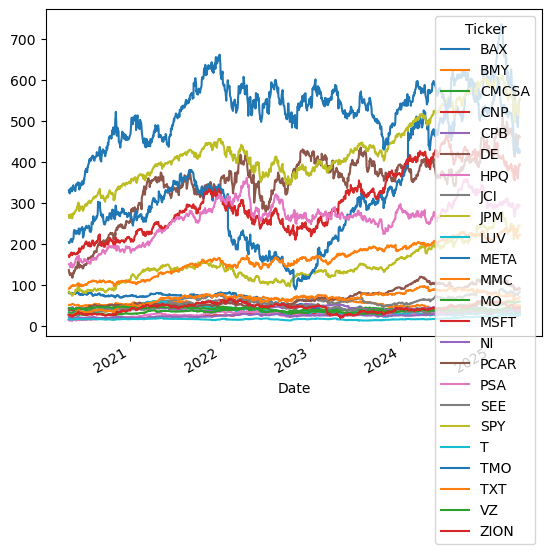

In [8]:
# Plot adjusted close price data
data['Adj Close'].plot()
plt.show()

In [9]:
# Closing price
data = data['Adj Close']
data

Ticker,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,JPM,LUV,...,NI,PCAR,PSA,SEE,SPY,T,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-30,80.126823,50.641907,33.012783,14.892096,42.546532,135.719360,13.165032,26.037798,83.326813,29.534527,...,21.098587,38.425812,150.045074,26.133320,270.082275,16.014036,330.662048,26.197428,43.062420,26.543396
2020-05-01,79.278450,50.183868,32.442528,14.393649,42.912575,129.291763,12.485986,24.919716,81.142700,27.625412,...,20.560827,37.904064,149.163177,25.795111,262.932281,15.714467,325.850555,26.058290,42.597691,25.947205
2020-05-04,78.763969,50.108921,31.775784,14.306203,43.227554,124.379799,12.647258,25.519009,80.176826,26.047089,...,20.502012,37.948463,146.517441,24.871901,263.657440,15.556799,322.797638,25.481863,42.155445,25.754063
2020-05-05,80.090706,51.099941,31.626635,14.332438,43.312683,126.447502,12.570865,25.626345,80.054985,24.969669,...,20.611244,37.776405,145.182465,26.709181,266.093536,15.630379,332.282440,25.143963,42.357830,25.342607
2020-05-06,79.350624,50.908394,30.828293,13.973909,43.040268,123.621979,12.443543,25.322224,78.549614,23.561462,...,19.258446,37.909618,142.471985,25.109556,264.289703,15.131087,331.126404,24.915384,41.705704,25.090687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-23,29.600000,48.529999,34.470001,37.340000,37.500000,456.440002,24.629999,78.279999,240.880005,25.520000,...,39.042820,89.080002,295.230011,26.799999,535.419983,27.190001,431.640015,66.230003,42.700001,44.320000
2025-04-24,30.410000,48.689999,33.189999,37.900002,36.720001,464.510010,25.330000,80.360001,244.639999,26.459999,...,39.400284,92.680000,293.790009,27.780001,546.690002,27.530001,426.660004,67.930000,42.810001,45.250000
2025-04-25,30.219999,47.900002,33.900002,38.189999,36.290001,459.299988,25.280001,81.070000,243.550003,26.490000,...,39.171906,91.889999,290.910004,27.639999,550.640015,26.809999,424.239990,68.419998,41.910000,44.840000


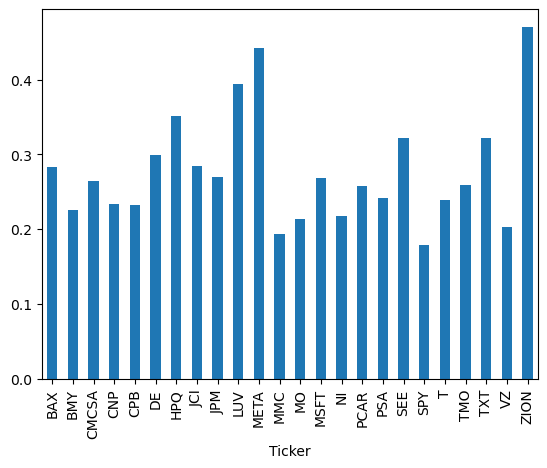

In [10]:
# Volatility of stocks
data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')
plt.show()  # Explicitly render the plot

## Process on all dataset


In [12]:
# Log of percentage change
cov_matrix = data.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Ticker,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,JPM,LUV,...,NI,PCAR,PSA,SEE,SPY,T,TMO,TXT,VZ,ZION
Ticker,,,,,,,,,,,,,,,,,,,,,
BAX,0.000320,0.000064,0.000095,0.000065,0.000057,0.000074,0.000092,0.000080,0.000084,0.000104,...,0.000062,0.000070,0.000074,0.000115,0.000075,0.000066,0.000104,0.000083,0.000063,0.000125
BMY,0.000064,0.000203,0.000060,0.000051,0.000048,0.000050,0.000049,0.000040,0.000047,0.000072,...,0.000051,0.000043,0.000050,0.000074,0.000043,0.000050,0.000069,0.000063,0.000044,0.000073
CMCSA,0.000095,0.000060,0.000279,0.000078,0.000025,0.000099,0.000130,0.000102,0.000122,0.000160,...,0.000071,0.000094,0.000063,0.000131,0.000100,0.000095,0.000058,0.000146,0.000070,0.000178
CNP,0.000065,0.000051,0.000078,0.000219,0.000051,0.000083,0.000076,0.000085,0.000083,0.000119,...,0.000140,0.000069,0.000094,0.000115,0.000069,0.000079,0.000054,0.000115,0.000065,0.000128
CPB,0.000057,0.000048,0.000025,0.000051,0.000215,0.000023,0.000013,0.000009,0.000017,-0.000007,...,0.000050,0.000047,0.000054,0.000056,0.000022,0.000050,0.000032,0.000020,0.000055,0.000009
DE,0.000074,0.000050,0.000099,0.000083,0.000023,0.000359,0.000183,0.000161,0.000159,0.000201,...,0.000071,0.000159,0.000077,0.000166,0.000109,0.000074,0.000076,0.000209,0.000052,0.000239
HPQ,0.000092,0.000049,0.000130,0.000076,0.000013,0.000183,0.000492,0.000187,0.000172,0.000232,...,0.000069,0.000159,0.000085,0.000186,0.000151,0.000081,0.000111,0.000230,0.000055,0.000276
JCI,0.000080,0.000040,0.000102,0.000085,0.000009,0.000161,0.000187,0.000323,0.000168,0.000197,...,0.000084,0.000155,0.000088,0.000178,0.000132,0.000062,0.000101,0.000210,0.000041,0.000268
JPM,0.000084,0.000047,0.000122,0.000083,0.000017,0.000159,0.000172,0.000168,0.000292,0.000225,...,0.000079,0.000147,0.000051,0.000165,0.000119,0.000092,0.000066,0.000220,0.000055,0.000348


In [14]:
# Yearly returns for individual companies
ind_er = data.resample('Y').last().pct_change().mean()
ind_er

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\1202306265.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = data.resample('Y').last().pct_change().mean()


Ticker
BAX     -0.137293
BMY      0.000917
CMCSA   -0.043283
CNP      0.151747
CPB     -0.011950
DE       0.133240
HPQ      0.076087
JCI      0.190150
JPM      0.186453
LUV     -0.081284
META     0.427742
MMC      0.165054
MO       0.160068
MSFT     0.178487
NI       0.160515
PCAR     0.151036
PSA      0.121893
SEE     -0.046208
SPY      0.112962
T        0.129284
TMO      0.006853
TXT      0.104349
VZ      -0.001308
ZION     0.070122
dtype: float64

In [16]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Ticker
BAX      0.282661
BMY      0.225276
CMCSA    0.264219
CNP      0.234226
CPB      0.232020
DE       0.299475
HPQ      0.350736
JCI      0.283995
JPM      0.270027
LUV      0.393411
META     0.442769
MMC      0.193352
MO       0.213049
MSFT     0.268719
NI       0.217001
PCAR     0.257653
PSA      0.241581
SEE      0.322190
SPY      0.179073
T        0.239053
TMO      0.259639
TXT      0.322441
VZ       0.202924
ZION     0.470560
dtype: float64

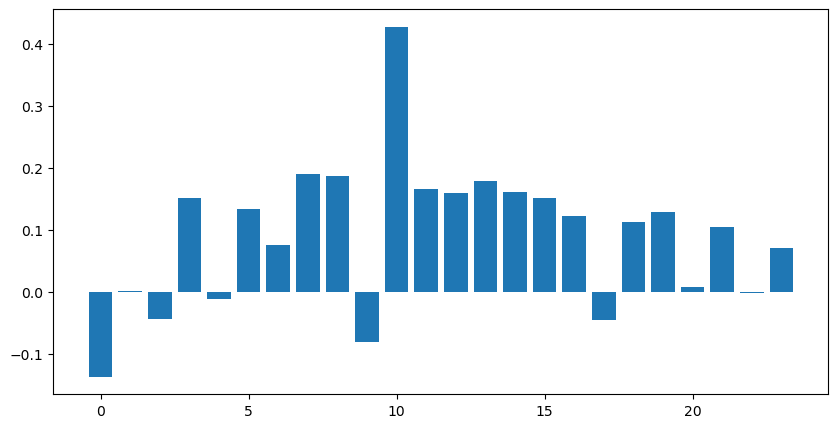

DONE


In [17]:
mu = np.array(ind_er)
cov = np.array(cov_matrix)

corr_matrix = data.pct_change().apply(lambda x: np.log(1+x)).corr()
labels = data.columns

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
k = np.arange(len(mu))
ax.bar(k, mu)
plt.show()


f = plt.figure(figsize=(10, 10))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(k, labels, fontsize=12, rotation=90)
plt.yticks(k, labels, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
print("DONE")

## Solve problem with NSGA_II

In [27]:
# import libs
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.repair import Repair
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import operator

In [29]:
class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(n_var=len(np.array(ticker)), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        # ff1 = exp_return*0.1 - exp_risk*0.1
        # ff2 = exp_return*exp_return*0.1 - exp_risk*0.1
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        # diversity (using entropy to measure)
        # diversity = -np.sum(x * np.log(x + 1e-10))

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

In [31]:
class PortfolioRepair(Repair):

    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

In [33]:
'''

# for crossover 
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.crossover.pntx import PointCrossover, SinglePointCrossover, TwoPointCrossover
from pymoo.operators.crossover.expx import ExponentialCrossover
from pymoo.operators.crossover.ux import UniformCrossover
from pymoo.operators.crossover.hux import HalfUniformCrossover

# for selection
# it seems that we can't set selection here
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.sampling.rnd import BinaryRandomSampling
from pymoo.operators.sampling.lhs import LHS

# Adding configure 
configurations = [
    # BinaryRandomSampling
    {
        'name': 'BinaryRandomSampling_SBX',
        'sampling': BinaryRandomSampling(),
        'crossover': SBX(),  # Default SBX parameters
    },
     {
        'name': 'BinaryRandomSampling_SinglePtXO',
         'sampling': BinaryRandomSampling(),
        'crossover': SinglePointCrossover(),  # More aggressive crossover
    },
    {
        'name': 'BinaryRandomSampling_TwoPtXO',
        'sampling': BinaryRandomSampling(),
        'crossover': TwoPointCrossover(),
    },
    
    {
        'name': 'BinaryRandomSampling_UnifXO',
        'sampling': BinaryRandomSampling(),
        'crossover': UniformCrossover(),
    },
    {
        'name': 'BinaryRandomSampling_HalfUnifXO',
        'sampling': BinaryRandomSampling(),
        'crossover': HalfUniformCrossover(),
    },

    # FloatRandomSampling
    {
        'name': 'FloatRandomSampling_SBX',
        'sampling': FloatRandomSampling(),
        'crossover': SBX(),  # Default SBX parameters
    },
     {
        'name': 'FloatRandomSampling_SinglePtXO',
         'sampling': FloatRandomSampling(),
        'crossover': SinglePointCrossover(),  # More aggressive crossover
    },
    {
        'name': 'FloatRandomSampling_TwoPtXO',
        'sampling': FloatRandomSampling(),
        'crossover': TwoPointCrossover(),
    },
    {
        'name': 'FloatRandomSampling_ExpXO',
        'sampling': FloatRandomSampling(),
        'crossover': ExponentialCrossover(),
    },
    {
        'name': 'FloatRandomSampling_UnifXO',
        'sampling': FloatRandomSampling(),
        'crossover': UniformCrossover(),
    },
    {
        'name': 'FloatRandomSampling_HalfUnifXO',
        'sampling': FloatRandomSampling(),
        'crossover': HalfUniformCrossover(),
    },
    
    # LHS
    {
        'name': 'LHS_SBX',
        'sampling': LHS(),
        'crossover': SBX(),  # Default SBX parameters
    },
     {
        'name': 'LHS_SinglePtXO',
         'sampling': LHS(),
        'crossover': SinglePointCrossover(),  # More aggressive crossover
    },
    {
        'name': 'LHS_TwoPtXO',
        'sampling': LHS(),
        'crossover': TwoPointCrossover(),
    },
    {
        'name': 'LHS_ExpXO',
        'sampling': LHS(),
        'crossover': ExponentialCrossover(),
    },
    {
        'name': 'LHS_UnifXO',
        'sampling': LHS(),
        'crossover': UniformCrossover(),
    },
    {
        'name': 'LHS_HalfUnifXO',
        'sampling': LHS(),
        'crossover': HalfUniformCrossover(),
    },
]
'''

''' we ignore
{
        'name': 'BinaryRandomSamplingn_ExpXO',
        'sampling': BinaryRandomSampling(),
        'crossover': ExponentialCrossover(),
    },
'''

'''
# Store results 
results = {}

'''

'\n# Store results \nresults = {}\n\n'

## Needed function 

In [36]:
def calculate_expected_returns(current_data):
    ind_er = current_data.resample('Y').last().pct_change().mean()
    # print(ind_er)
    return ind_er

def calculate_covariance_matrix(current_data):
    cov_matrix = current_data.pct_change().apply(lambda x: np.log(1+x)).cov()
    # print(cov_matrix)
    return cov_matrix
    
def execute_trades(stock_alloc, final_weight, current_budget, price_day, budget_history, stock_alloc_history):
    # extract trade date
    trade_date = data.index[price_day]
    print(f'trade data is {trade_date}')

    # extract stock price in trade date
    prices_series = data.loc[[trade_date]]
    prices_array = prices_series.to_numpy().ravel()  # shape (n,)
    # print(f'Prices: {prices_array}')

    # print(f'Stock allocation: {stock_alloc}')

    
    if not np.allclose(stock_alloc, np.zeros(len(ticker))):
        current_budget = stock_alloc @ prices_array
    
    
    
    dollar_alloc = current_budget*final_weight
    # current_budget = final_weight.T@data[price_date] 

    

    # Element-wise division to get number of shares
    stock_alloc[:] = dollar_alloc / prices_array  # modifies caller's array
    # print(f'Stock allocation (shares): {stock_alloc}')

    budget_history.append(current_budget)
    stock_alloc_history.append(stock_alloc.copy())
    #print(f'stock_alloc is {stock_alloc}')
    print(f'current budget is {current_budget}')
    

In [40]:
'''
%%time
for config in configurations:
    print(f"\nRunning configuration: {config['name']}")
'''

results = {}
portfolio_history = []
data_size = len(data)
current_budget = 1_000_000
stock_alloc = np.zeros(len(ticker))  
budget_history = []
stock_alloc_history = []
test_period = 250

for day in range(test_period):
    print(f"Current day is: {day}")
    serach_day = data_size - (test_period-day)
    current_data = data.iloc[:serach_day] 

    # print(current_data)
    mu = calculate_expected_returns(current_data)
    cov = calculate_covariance_matrix(current_data)
    # print(f"current_data size is {len(current_data)}")
    problem = PortfolioProblem(mu, cov)
    # print(current_data)
    
    '''
    algorithm = NSGA2(repair=PortfolioRepair(),
                      sampling = config['sampling'],
                      crossover=config['crossover'])
    '''
    
    algorithm = NSGA2(repair=PortfolioRepair())
    

    res = minimize(problem,
                   algorithm,
                   seed=1,
                   verbose=False)

    # adding the result
    # results[config['name']] = res

    # Get optimal portfolio weights
    X, F, sharpe = res.opt.get("X", "F", "sharpe")
    F = F * [1, -1]  # Adjust for minimization/maximization
    
    # Select portfolio with maximum Sharpe ratio
    max_sharpe_idx = sharpe.argmax()
    optimal_weights = X[max_sharpe_idx]

    '''
    # Add other indicators (f1, ..., fk) for daily allocation
    additional_indicators = calculate_technical_indicators(current_data)  # Assume this function exists
    final_weights = adjust_weights_with_indicators(optimal_weights, additional_indicators)
    '''
    
    # Make investment with adjusted weights
    daily_return = execute_trades(stock_alloc, optimal_weights, current_budget, serach_day, budget_history, stock_alloc_history)  # Assume this function exists
    portfolio_history.append(daily_return)
    

Current day is: 0


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-04-30 00:00:00
current budget is 1000000
Current day is: 1


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-01 00:00:00
current budget is 1007264.3185326154
Current day is: 2


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-02 00:00:00
current budget is 1008683.5860369448
Current day is: 3


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-03 00:00:00
current budget is 1009020.3565953579
Current day is: 4


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-06 00:00:00
current budget is 1022983.1373180803
Current day is: 5


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-07 00:00:00
current budget is 1033459.9111432729
Current day is: 6


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-08 00:00:00
current budget is 1037521.1805092739
Current day is: 7


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-09 00:00:00
current budget is 1048323.7382097768
Current day is: 8


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-10 00:00:00
current budget is 1051013.1205075956
Current day is: 9


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-13 00:00:00
current budget is 1036251.1572320401
Current day is: 10


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-14 00:00:00
current budget is 1043237.712456115
Current day is: 11


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-15 00:00:00
current budget is 1052146.1480402988
Current day is: 12


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-16 00:00:00
current budget is 1044096.9073718122
Current day is: 13


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-17 00:00:00
current budget is 1044969.1307941247
Current day is: 14


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-20 00:00:00
current budget is 1039757.9759155808
Current day is: 15


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-21 00:00:00
current budget is 1038451.5828791899
Current day is: 16


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-22 00:00:00
current budget is 1051678.5514809315
Current day is: 17


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-23 00:00:00
current budget is 1046872.773911189
Current day is: 18


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-24 00:00:00
current budget is 1056448.4916051463
Current day is: 19


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-28 00:00:00
current budget is 1046200.0403528044
Current day is: 20


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-29 00:00:00
current budget is 1029384.4197016557
Current day is: 21


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-30 00:00:00
current budget is 1026713.5086100386
Current day is: 22


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-05-31 00:00:00
current budget is 1037949.094420189
Current day is: 23


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-03 00:00:00
current budget is 1035298.7813299947
Current day is: 24


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-04 00:00:00
current budget is 1040379.8477616676
Current day is: 25


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-05 00:00:00
current budget is 1062315.2916663587
Current day is: 26


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-06 00:00:00
current budget is 1059280.1653481398
Current day is: 27


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-07 00:00:00
current budget is 1057080.53773668
Current day is: 28


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-10 00:00:00
current budget is 1060821.0718281455
Current day is: 29


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-11 00:00:00
current budget is 1059228.9069683016
Current day is: 30


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-12 00:00:00
current budget is 1063772.0517014246
Current day is: 31


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-13 00:00:00
current budget is 1060671.3750722688
Current day is: 32


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-14 00:00:00
current budget is 1059161.935996981
Current day is: 33


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-17 00:00:00
current budget is 1068243.1108571491
Current day is: 34


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-18 00:00:00
current budget is 1065180.0104425214
Current day is: 35


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-20 00:00:00
current budget is 1068861.8959554895
Current day is: 36


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-21 00:00:00
current budget is 1060434.663432145
Current day is: 37


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-24 00:00:00
current budget is 1068690.3288309122
Current day is: 38


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-25 00:00:00
current budget is 1066580.0642286553
Current day is: 39


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-26 00:00:00
current budget is 1058405.4309639232
Current day is: 40


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-27 00:00:00
current budget is 1061732.3473296673
Current day is: 41


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-06-28 00:00:00
current budget is 1050578.4996152024
Current day is: 42


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-01 00:00:00
current budget is 1048713.9771551134
Current day is: 43


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-02 00:00:00
current budget is 1052738.594080978
Current day is: 44


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-03 00:00:00
current budget is 1056599.4545191438
Current day is: 45


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-05 00:00:00
current budget is 1072772.9960826777
Current day is: 46


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-08 00:00:00
current budget is 1070088.2952563595
Current day is: 47


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-09 00:00:00
current budget is 1065537.6922492888
Current day is: 48


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-10 00:00:00
current budget is 1075906.1590565331
Current day is: 49


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-11 00:00:00
current budget is 1067590.0765527987
Current day is: 50


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-12 00:00:00
current budget is 1062386.5757952693
Current day is: 51


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-15 00:00:00
current budget is 1065101.5654638663
Current day is: 52


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-16 00:00:00
current budget is 1071484.4750074549
Current day is: 53


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-17 00:00:00
current budget is 1065955.571335487
Current day is: 54


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-18 00:00:00
current budget is 1067911.1940596106
Current day is: 55


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-19 00:00:00
current budget is 1061678.488968465
Current day is: 56


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-22 00:00:00
current budget is 1074970.2740168395
Current day is: 57


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-23 00:00:00
current budget is 1049365.5567774312
Current day is: 58


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-24 00:00:00
current budget is 1037240.5616879993
Current day is: 59


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-25 00:00:00
current budget is 1031024.1201501868
Current day is: 60


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-26 00:00:00
current budget is 1047608.0310595761
Current day is: 61


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-29 00:00:00
current budget is 1049815.5555177606
Current day is: 62


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-30 00:00:00
current budget is 1051551.5510145326
Current day is: 63


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-07-31 00:00:00
current budget is 1055184.1156092044
Current day is: 64


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-01 00:00:00
current budget is 1072590.7092417525
Current day is: 65


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-02 00:00:00
current budget is 1067646.7590293174
Current day is: 66


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-05 00:00:00
current budget is 1034750.0643434819
Current day is: 67


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-06 00:00:00
current budget is 1049458.8444458647
Current day is: 68


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-07 00:00:00
current budget is 1049161.480302031
Current day is: 69


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-08 00:00:00
current budget is 1067909.4232396374
Current day is: 70


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-09 00:00:00
current budget is 1074103.0897828927
Current day is: 71


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-12 00:00:00
current budget is 1065938.2414556262
Current day is: 72


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-13 00:00:00
current budget is 1078255.0513892896
Current day is: 73


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-14 00:00:00
current budget is 1086035.0533832468
Current day is: 74


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-15 00:00:00
current budget is 1091547.3700839174
Current day is: 75


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-16 00:00:00
current budget is 1090421.0123067582
Current day is: 76


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-19 00:00:00
current budget is 1096221.226530122
Current day is: 77


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-20 00:00:00
current budget is 1096958.864936449
Current day is: 78


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-21 00:00:00
current budget is 1104485.0909788327
Current day is: 79


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-22 00:00:00
current budget is 1105457.7889687202
Current day is: 80


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-23 00:00:00
current budget is 1106184.6843994625
Current day is: 81


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-26 00:00:00
current budget is 1104233.9668792542
Current day is: 82


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-27 00:00:00
current budget is 1106361.4395657273
Current day is: 83


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-28 00:00:00
current budget is 1104946.37398618
Current day is: 84


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-29 00:00:00
current budget is 1108621.645552749
Current day is: 85


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-08-30 00:00:00
current budget is 1115359.8800296988
Current day is: 86


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-03 00:00:00
current budget is 1111553.454276655
Current day is: 87


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-04 00:00:00
current budget is 1118624.21266247
Current day is: 88


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-05 00:00:00
current budget is 1109541.6207795325
Current day is: 89


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-06 00:00:00
current budget is 1100450.4995160098
Current day is: 90


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-09 00:00:00
current budget is 1112912.334528144
Current day is: 91


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-10 00:00:00
current budget is 1117721.6753555804
Current day is: 92


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-11 00:00:00
current budget is 1112188.4404655804
Current day is: 93


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-12 00:00:00
current budget is 1119916.2685783408
Current day is: 94


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-13 00:00:00
current budget is 1121453.976079876
Current day is: 95


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-16 00:00:00
current budget is 1130920.4102697934
Current day is: 96


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-17 00:00:00
current budget is 1124344.6718132899
Current day is: 97


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-18 00:00:00
current budget is 1123289.2276324325
Current day is: 98


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-19 00:00:00
current budget is 1132929.7579036974
Current day is: 99


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-20 00:00:00
current budget is 1133857.0519246007
Current day is: 100


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-23 00:00:00
current budget is 1140358.7479148689
Current day is: 101


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-24 00:00:00
current budget is 1137846.3556989962
Current day is: 102


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-25 00:00:00
current budget is 1138063.0237575972
Current day is: 103


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-26 00:00:00
current budget is 1135959.3856756997
Current day is: 104


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-27 00:00:00
current budget is 1136913.966459029
Current day is: 105


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-09-30 00:00:00
current budget is 1141422.9019986615
Current day is: 106


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-01 00:00:00
current budget is 1141860.1238558954
Current day is: 107


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-02 00:00:00
current budget is 1136016.7081190273
Current day is: 108


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-03 00:00:00
current budget is 1139667.6538994065
Current day is: 109


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-04 00:00:00
current budget is 1148639.639590623
Current day is: 110


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-07 00:00:00
current budget is 1136604.01882032
Current day is: 111


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-08 00:00:00
current budget is 1145878.2424560413
Current day is: 112


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-09 00:00:00
current budget is 1151318.7396457216
Current day is: 113


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-10 00:00:00
current budget is 1138896.4182679693
Current day is: 114


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-11 00:00:00
current budget is 1150542.3054958922
Current day is: 115


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-14 00:00:00
current budget is 1158266.9693689868
Current day is: 116


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-15 00:00:00
current budget is 1151962.475977114
Current day is: 117


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-16 00:00:00
current budget is 1153942.3420720743
Current day is: 118


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-17 00:00:00
current budget is 1151455.0592427442
Current day is: 119


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-18 00:00:00
current budget is 1150941.9986735857
Current day is: 120


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-21 00:00:00
current budget is 1140118.8190125409
Current day is: 121


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-22 00:00:00
current budget is 1139597.3462993193
Current day is: 122


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-23 00:00:00
current budget is 1131269.4508226379
Current day is: 123


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-24 00:00:00
current budget is 1133222.7144919503
Current day is: 124


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-25 00:00:00
current budget is 1134131.3503794256
Current day is: 125


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-28 00:00:00
current budget is 1141913.489991623
Current day is: 126


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-29 00:00:00
current budget is 1143887.9061783873
Current day is: 127


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-30 00:00:00
current budget is 1143627.9919954115
Current day is: 128


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-10-31 00:00:00
current budget is 1134688.8930334072
Current day is: 129


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-01 00:00:00
current budget is 1127702.14383693
Current day is: 130


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-04 00:00:00
current budget is 1130201.3682425083
Current day is: 131


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-05 00:00:00
current budget is 1145742.1489651925
Current day is: 132


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-06 00:00:00
current budget is 1158981.985363702
Current day is: 133


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-07 00:00:00
current budget is 1158493.409098875
Current day is: 134


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-08 00:00:00
current budget is 1170029.0497837188
Current day is: 135


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-11 00:00:00
current budget is 1170027.279732548
Current day is: 136


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-12 00:00:00
current budget is 1172319.4566092312
Current day is: 137


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-13 00:00:00
current budget is 1176822.7968794056
Current day is: 138


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-14 00:00:00
current budget is 1166197.6839762123
Current day is: 139


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-15 00:00:00
current budget is 1154596.401497786
Current day is: 140


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-18 00:00:00
current budget is 1158902.5107234719
Current day is: 141


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-19 00:00:00
current budget is 1155280.204937273
Current day is: 142


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-20 00:00:00
current budget is 1158545.1068428939
Current day is: 143


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-21 00:00:00
current budget is 1169523.7718056194
Current day is: 144


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-22 00:00:00
current budget is 1173767.0670198705
Current day is: 145


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-25 00:00:00
current budget is 1184150.228527451
Current day is: 146


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-26 00:00:00
current budget is 1194229.9054015097
Current day is: 147


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-27 00:00:00
current budget is 1193263.319315256
Current day is: 148


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-11-29 00:00:00
current budget is 1195893.1261196588
Current day is: 149


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-02 00:00:00
current budget is 1195612.2331361184
Current day is: 150


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-03 00:00:00
current budget is 1199882.5253699708
Current day is: 151


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-04 00:00:00
current budget is 1200255.524750031
Current day is: 152


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-05 00:00:00
current budget is 1197252.9287324618
Current day is: 153


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-06 00:00:00
current budget is 1198683.626376552
Current day is: 154


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-09 00:00:00
current budget is 1175484.4157400513
Current day is: 155


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-10 00:00:00
current budget is 1175414.3863222129
Current day is: 156


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-11 00:00:00
current budget is 1177732.099066254
Current day is: 157


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-12 00:00:00
current budget is 1173996.0238257009
Current day is: 158


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-13 00:00:00
current budget is 1167673.2109927232
Current day is: 159


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-16 00:00:00
current budget is 1165691.078072603
Current day is: 160


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-17 00:00:00
current budget is 1158590.6268206777
Current day is: 161


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-18 00:00:00
current budget is 1126809.9214108293
Current day is: 162


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-19 00:00:00
current budget is 1124734.9414125967
Current day is: 163


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-20 00:00:00
current budget is 1126917.6362564233
Current day is: 164


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-23 00:00:00
current budget is 1135843.0230148085
Current day is: 165


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-24 00:00:00
current budget is 1144725.5393369875
Current day is: 166


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-26 00:00:00
current budget is 1143589.3523014756
Current day is: 167


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-27 00:00:00
current budget is 1138135.348627231
Current day is: 168


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-30 00:00:00
current budget is 1129026.2094816202
Current day is: 169


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2024-12-31 00:00:00
current budget is 1127970.29507435
Current day is: 170


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-02 00:00:00
current budget is 1132557.1493489132
Current day is: 171


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-03 00:00:00
current budget is 1139667.3932556529
Current day is: 172


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-06 00:00:00
current budget is 1144927.6666170429
Current day is: 173


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-07 00:00:00
current budget is 1140791.4474341199
Current day is: 174


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-08 00:00:00
current budget is 1140278.592023807
Current day is: 175


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-10 00:00:00
current budget is 1132637.3408798804
Current day is: 176


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-13 00:00:00
current budget is 1136416.841592034
Current day is: 177


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-14 00:00:00
current budget is 1136830.2358305503
Current day is: 178


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-15 00:00:00
current budget is 1152115.93223019
Current day is: 179


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-16 00:00:00
current budget is 1160189.0087247186
Current day is: 180


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-17 00:00:00
current budget is 1167126.0060841772
Current day is: 181


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-21 00:00:00
current budget is 1174333.4274007927
Current day is: 182


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-22 00:00:00
current budget is 1170224.1930688818
Current day is: 183


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-23 00:00:00
current budget is 1178305.5990852637
Current day is: 184


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-24 00:00:00
current budget is 1187442.7876036656
Current day is: 185


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-27 00:00:00
current budget is 1190485.2934353328
Current day is: 186


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-28 00:00:00
current budget is 1191035.2525790546
Current day is: 187


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-29 00:00:00
current budget is 1195652.7786136398
Current day is: 188


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-30 00:00:00
current budget is 1206832.8197598562
Current day is: 189


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-01-31 00:00:00
current budget is 1203684.0635100724
Current day is: 190


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-03 00:00:00
current budget is 1211127.3802794889
Current day is: 191


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-04 00:00:00
current budget is 1216394.2091963491
Current day is: 192


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-05 00:00:00
current budget is 1223227.3083834474
Current day is: 193


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-06 00:00:00
current budget is 1231129.1797627504
Current day is: 194


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-07 00:00:00
current budget is 1229803.1713311693
Current day is: 195


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-10 00:00:00
current budget is 1234895.935986839
Current day is: 196


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-11 00:00:00
current budget is 1240356.305005643
Current day is: 197


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-12 00:00:00
current budget is 1240521.93493996
Current day is: 198


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-13 00:00:00
current budget is 1252004.2937041698
Current day is: 199


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-14 00:00:00
current budget is 1253126.7341720427
Current day is: 200


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-18 00:00:00
current budget is 1246276.895899361
Current day is: 201


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-19 00:00:00
current budget is 1244162.5555430232
Current day is: 202


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-20 00:00:00
current budget is 1234711.9846767914
Current day is: 203


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-21 00:00:00
current budget is 1228421.5228454631
Current day is: 204


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-24 00:00:00
current budget is 1222774.837110731
Current day is: 205


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-25 00:00:00
current budget is 1218844.0573316324
Current day is: 206


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-26 00:00:00
current budget is 1223503.2747744233
Current day is: 207


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-27 00:00:00
current budget is 1219477.2002285153
Current day is: 208


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-02-28 00:00:00
current budget is 1238570.1978873187
Current day is: 209


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-03 00:00:00
current budget is 1238608.7917326288
Current day is: 210


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-04 00:00:00
current budget is 1207738.3443553664
Current day is: 211


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-05 00:00:00
current budget is 1217639.855717446
Current day is: 212


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-06 00:00:00
current budget is 1201095.9563965653
Current day is: 213


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-07 00:00:00
current budget is 1201480.2942551016
Current day is: 214


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-10 00:00:00
current budget is 1188012.7726611139
Current day is: 215


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-11 00:00:00
current budget is 1177140.9624576014
Current day is: 216


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-12 00:00:00
current budget is 1177062.70634546
Current day is: 217


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-13 00:00:00
current budget is 1158857.632168037
Current day is: 218


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-14 00:00:00
current budget is 1178214.8604926695
Current day is: 219


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-17 00:00:00
current budget is 1178088.7179189387
Current day is: 220


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-18 00:00:00
current budget is 1161360.589746555
Current day is: 221


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-19 00:00:00
current budget is 1163451.8149855107
Current day is: 222


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-20 00:00:00
current budget is 1166881.7348644813
Current day is: 223


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-21 00:00:00
current budget is 1166066.2657630192
Current day is: 224


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-24 00:00:00
current budget is 1184769.928431914
Current day is: 225


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-25 00:00:00
current budget is 1189931.314759212
Current day is: 226


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-26 00:00:00
current budget is 1192491.7908073456
Current day is: 227


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-27 00:00:00
current budget is 1192484.3347254223
Current day is: 228


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-28 00:00:00
current budget is 1178045.1907730647
Current day is: 229


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-03-31 00:00:00
current budget is 1190666.0094728426
Current day is: 230


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-01 00:00:00
current budget is 1191229.9067352656
Current day is: 231


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-02 00:00:00
current budget is 1181451.228020913
Current day is: 232


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-03 00:00:00
current budget is 1152224.3039911606
Current day is: 233


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-04 00:00:00
current budget is 1095588.5133071225
Current day is: 234


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-07 00:00:00
current budget is 1086116.208868927
Current day is: 235


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-08 00:00:00
current budget is 1077612.8145625677
Current day is: 236


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-09 00:00:00
current budget is 1143829.7120006261
Current day is: 237


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-10 00:00:00
current budget is 1117940.688339637
Current day is: 238


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-11 00:00:00
current budget is 1127645.1595187532
Current day is: 239


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-14 00:00:00
current budget is 1131277.325750283
Current day is: 240


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-15 00:00:00
current budget is 1123447.306603625
Current day is: 241


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-16 00:00:00
current budget is 1107689.3042981683
Current day is: 242


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-17 00:00:00
current budget is 1099170.9675959302
Current day is: 243


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-21 00:00:00
current budget is 1070960.8561167626
Current day is: 244


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-22 00:00:00
current budget is 1099271.2120578277
Current day is: 245


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-23 00:00:00
current budget is 1110997.3920147165
Current day is: 246


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-24 00:00:00
current budget is 1123727.1203020469
Current day is: 247


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-25 00:00:00
current budget is 1127576.540485339
Current day is: 248


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-28 00:00:00
current budget is 1131557.46905491
Current day is: 249


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_27896\659691616.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


trade data is 2025-04-29 00:00:00
current budget is 1139092.1176929986


In [46]:
for i in range(len(stock_alloc_history)):
    print(stock_alloc_history[i]) 

[   0.           28.31223434    0.            0.            0.
    0.            0.            0.            0.            0.
  570.33266563 1156.71807071   36.05417048  127.5946162     0.
 4659.42680334    4.89449259    0.            0.            0.
    0.            0.            0.            0.        ]
[   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
  633.66610962 1602.57814156    0.            0.            0.
 4036.56935072    8.09393646    0.            0.            0.
    0.            0.            0.            0.        ]
[   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
  607.10191167 1920.89765197    0.            0.            0.
 3559.46321638    0.            0.            0.            0.
    0.            0.            0.            0.        ]
[   0.            0.            0.            0.            0.
    0. 

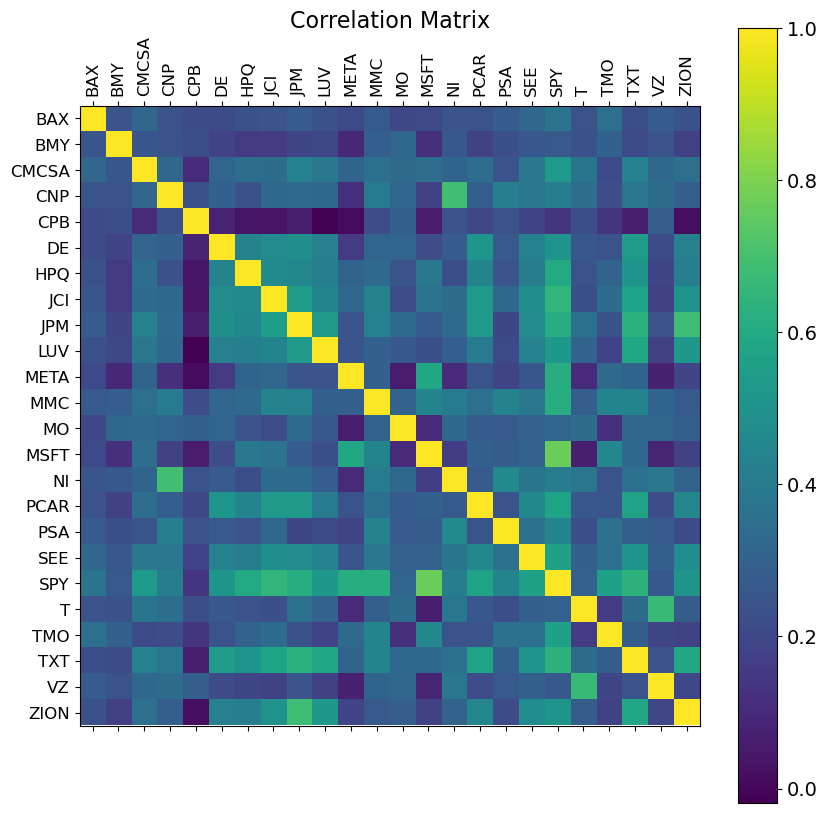

<Figure size 1400x600 with 0 Axes>

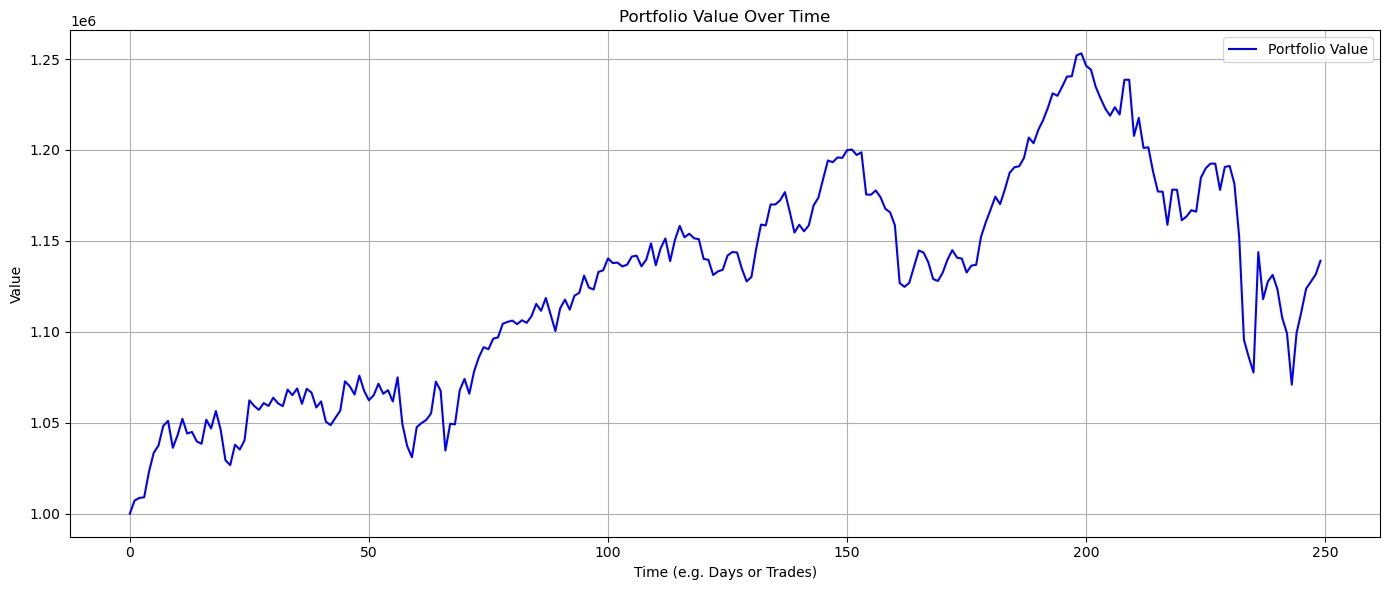

In [48]:
# Plotting
plt.figure(figsize=(14, 6))
plt.plot(budget_history, label="Portfolio Value", color='blue')
plt.title("Portfolio Value Over Time")
plt.xlabel("Time (e.g. Days or Trades)")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Compare results
for name, res in results.items():
    print(f"\nThe result of {name} is as follows\n")
    X, F, sharpe = res.opt.get("X", "F", "sharpe")
    F = F * [1, -1]
    max_sharpe = sharpe.argmax()

    '''
    # equal weights
    x = np.zeros((len(ticker), 1))
    x = x + 1.0/len(x)

    plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
    plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
    plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
    plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
    plt.legend()
    plt.xlabel("expected volatility")
    plt.ylabel("expected return")
    plt.show()

    plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
    plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
    plt.legend()
    plt.xlabel("expected volatility")
    plt.ylabel("expected return")
    plt.show()
    '''
    x = X[max_sharpe].T

    print("Best Sharpe: \nReturn     = ", x.T @ mu)
    print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))
    print("sharpo ratio = ", (x.T @ mu - 0.02)/(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0)))


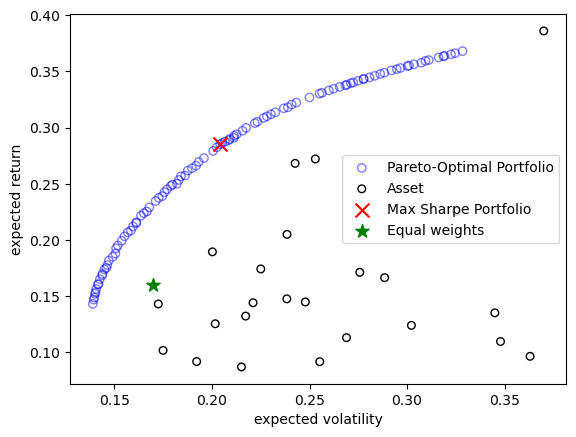

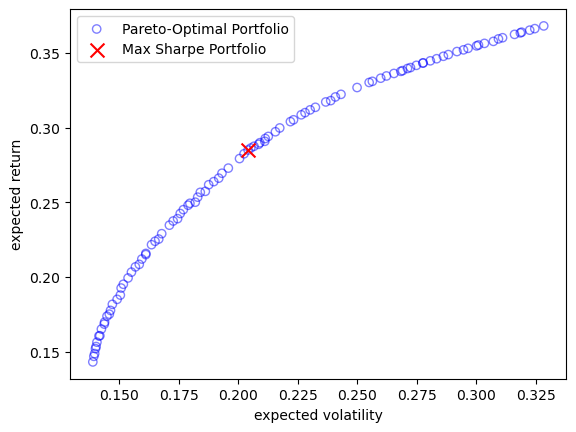

In [52]:
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

# equal weights
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

In [54]:
allocation = {name: w for name, w in zip(data.columns, X[max_sharpe])}
allocation = sorted(allocation.items(), key=operator.itemgetter(1), reverse=True)

print("Allocation With Best Sharpe")
for name, w in allocation:
    print(f"{name:<5} {w}")

Allocation With Best Sharpe
TMO   0.32297696275160204
META  0.27453075912247143
MSFT  0.1774543857862301
NI    0.10187217354534035
CMCSA 0.06870700223721722
LUV   0.05445871655713892
BAX   0.0
BMY   0.0
CNP   0.0
CPB   0.0
DE    0.0
HPQ   0.0
JCI   0.0
JPM   0.0
MMC   0.0
MO    0.0
PCAR  0.0
PSA   0.0
SEE   0.0
SPY   0.0
T     0.0
TXT   0.0
VZ    0.0
ZION  0.0


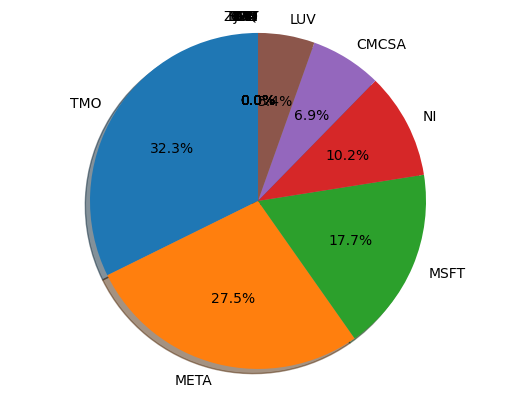

In [56]:
for al in allocation:
    if al[1] <= 1e-2:
        allocation.remove(al)

col_name = []
w1 = []
for name, w in allocation:
    col_name.append(name)
    w1.append(w)
    
fig1, ax1 = plt.subplots()
ax1.pie(w1, labels=col_name, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [191]:
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

print("For equal weights: \nReturn     = ", (x.T @ mu)[0])
print("Volatility = ", (np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))[0][0])

For equal weights: 
Return     =  0.0933490427723025
Volatility =  0.16460265032746366


In [193]:
x = X[max_sharpe].T

print("Best Sharpe: \nReturn     = ", x.T @ mu)
print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))

Best Sharpe: 
Return     =  0.019924009576235042
Volatility =  0.48197988245737083


# Solve problem with NSGA_II and multi_object

In [121]:
# import libs
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.repair import Repair
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import operator

In [ ]:
class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(n_var=len(np.array(ticker)), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        # diversity (using entropy to measure)
        # diversity = -np.sum(x * np.log(x + 1e-10))

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

## Solve problem with SMS-EMOA

In [54]:
class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(n_var=len(np.array(ticker)), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

In [56]:
class PortfolioRepair(Repair):

    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

In [58]:
%%time
problem = PortfolioProblem(mu, cov)

algorithm = SMSEMOA(repair=PortfolioRepair())

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=False)

CPU times: total: 4.48 s
Wall time: 4.51 s


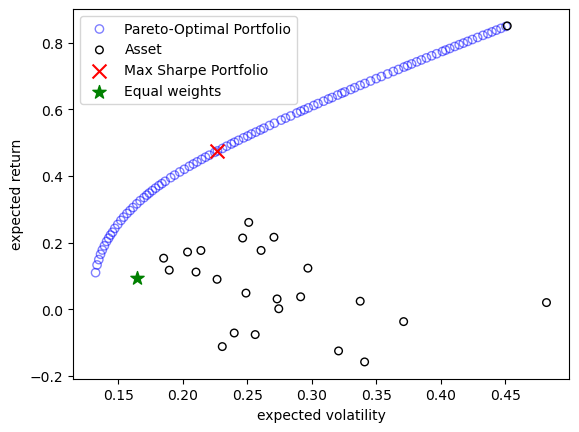

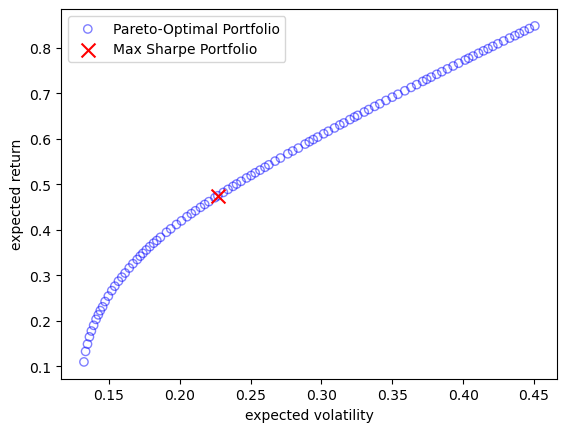

In [59]:
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

# equal weights
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

In [60]:
allocation = {name: w for name, w in zip(data.columns, X[max_sharpe])}
allocation = sorted(allocation.items(), key=operator.itemgetter(1), reverse=True)

print("Allocation With Best Sharpe")
for name, w in allocation:
    print(f"{name:<5} {w}")

Allocation With Best Sharpe
META  0.4283802127001904
MO    0.24717412321684126
T     0.17433582082474103
NI    0.09308526424121474
JPM   0.0570245790170126
BAX   0.0
BMY   0.0
CMCSA 0.0
CNP   0.0
CPB   0.0
DE    0.0
HPQ   0.0
JCI   0.0
LUV   0.0
MMC   0.0
MSFT  0.0
PCAR  0.0
PSA   0.0
SEE   0.0
SPY   0.0
TMO   0.0
TXT   0.0
VZ    0.0
ZION  0.0


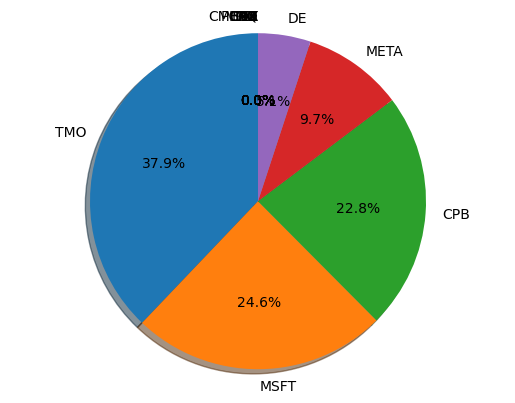

In [87]:
for al in allocation:
    if al[1] <= 1e-2:
        allocation.remove(al)

col_name = []
w1 = []
for name, w in allocation:
    col_name.append(name)
    w1.append(w)
    
fig1, ax1 = plt.subplots()
ax1.pie(w1, labels=col_name, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [89]:
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

print("For equal weights: \nReturn     = ", (x.T @ mu)[0])
print("Volatility = ", (np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))[0][0])

For equal weights: 
Return     =  0.18414071533539172
Volatility =  0.22009098632369006


In [91]:
x = X[max_sharpe].T

print("Best Sharpe: \nReturn     = ", x.T @ mu)
print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))

Best Sharpe: 
Return     =  0.41356283983338016
Volatility =  0.23119339384867044


In [ ]:
# To export jupyter notebook to html, save your notebook and run this cell
!jupyter nbconvert --to html Project_codes.ipynb

# Solve problem with MOEA/D

In [110]:
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.repair import Repair
from pymoo.optimize import minimize
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.util.ref_dirs import get_reference_directions
import numpy as np
import matplotlib.pyplot as plt
import operator

class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        n_assets = len(mu)
        super().__init__(n_var=n_assets, n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

class PortfolioRepair(Repair):

    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

# Problem definition
problem = PortfolioProblem(mu, cov)

# MOEAD Algorithm
ref_dirs = get_reference_directions("uniform", 2, n_partitions=12)

algorithm = MOEAD(
    ref_dirs,
    n_neighbors=15,
    prob_neighbor_mating=0.7,
)

# Run optimization
res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

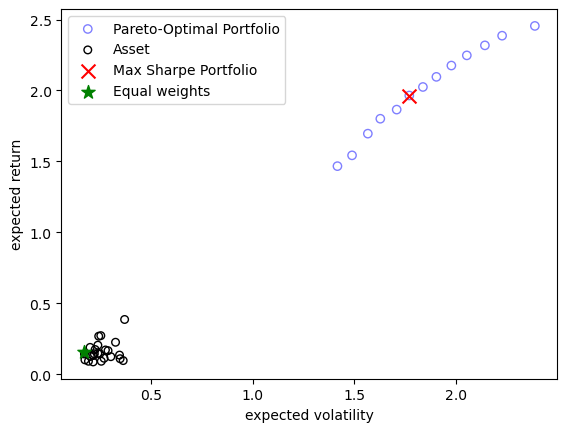

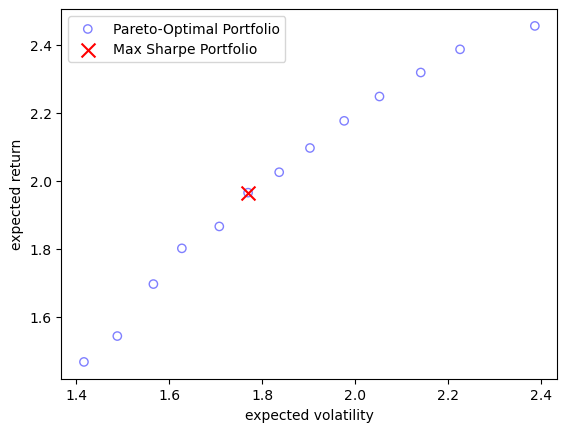

In [112]:
# Extract results
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]  # Invert return back to positive
max_sharpe = sharpe.argmax()

# Equal weights portfolio
x = np.ones(len(mu)) / len(mu)

# Plot results
plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(np.sqrt(np.diag(cov)) * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

In [38]:
x = X[max_sharpe].T

print("Best Sharpe: \nReturn     = ", x.T @ mu)
print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))

Best Sharpe: 
Return     =  1.9644809221279909
Volatility =  1.7699252006561448
